## Importing relevant libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visuilzation tools
import seaborn as sns  # more attractive visuilzation tools
from sklearn.ensemble import RandomForestClassifier # model 1
from sklearn.tree import DecisionTreeClassifier    # model 2
from random import choice # random module
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix # metrics for analysis prediction result
%matplotlib inline


In [2]:
# ignore any warning
import warnings
warnings.filterwarnings('ignore')

## Loading the data

In [3]:
df_train = pd.read_csv('/kaggle/input/disease-prediction-using-machine-learning/Training.csv')
df_test = pd.read_csv('/kaggle/input/disease-prediction-using-machine-learning/Testing.csv')

In [4]:
df_train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [5]:
df_test.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


## Exploring the data

In [6]:
print(f"Training data Shape : {df_train.shape}\nTest data Shape : {df_test.shape}")

Training data Shape : (4920, 134)
Test data Shape : (42, 133)


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


In [8]:
df_train.drop('Unnamed: 133', axis=1, inplace=True) # removing unwanted data

In [9]:
pd.options.display.float_format = '{:.2f}'.format     # rounding the float value in dataframe to 2 digits
df_train.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.00,4920.00,4920.00,4920.00,4920.00,4920.00,4920.00,4920.00,4920.00,4920.00,...,4920.00,4920.00,4920.00,4920.00,4920.00,4920.00,4920.00,4920.00,4920.00,4920.00
mean,0.14,0.16,0.02,0.05,0.02,0.16,0.14,0.05,0.05,0.02,...,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02
std,0.34,0.37,0.15,0.21,0.15,0.37,0.35,0.21,0.21,0.15,...,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [10]:
df_train.isnull().sum() # checking for null values

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [11]:
df_train.corr()   #looking for correletaion

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
itching,1.00,0.32,0.33,-0.09,-0.06,-0.18,-0.16,0.20,-0.09,-0.06,...,-0.06,-0.06,-0.06,-0.06,-0.06,-0.06,-0.06,-0.06,-0.06,-0.06
skin_rash,0.32,1.00,0.30,-0.09,-0.07,-0.03,0.17,0.16,-0.09,-0.07,...,0.32,0.32,0.32,0.33,0.33,0.33,0.33,0.33,0.33,0.33
nodal_skin_eruptions,0.33,0.30,1.00,-0.03,-0.02,-0.07,-0.06,-0.03,-0.03,-0.02,...,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02
continuous_sneezing,-0.09,-0.09,-0.03,1.00,0.61,0.45,-0.09,-0.05,-0.05,-0.03,...,-0.03,-0.03,-0.03,-0.03,-0.03,-0.03,-0.03,-0.03,-0.03,-0.03
shivering,-0.06,-0.07,-0.02,0.61,1.00,0.30,-0.06,-0.03,-0.03,-0.02,...,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
small_dents_in_nails,-0.06,0.33,-0.02,-0.03,-0.02,-0.07,0.36,-0.03,-0.03,-0.02,...,-0.02,-0.02,-0.02,0.95,0.95,1.00,0.95,-0.02,-0.02,-0.02
inflammatory_nails,-0.06,0.33,-0.02,-0.03,-0.02,-0.07,0.36,-0.03,-0.03,-0.02,...,-0.02,-0.02,-0.02,0.95,0.95,0.95,1.00,-0.02,-0.02,-0.02
blister,-0.06,0.33,-0.02,-0.03,-0.02,-0.07,-0.06,-0.03,-0.03,-0.02,...,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,1.00,0.95,0.95
red_sore_around_nose,-0.06,0.33,-0.02,-0.03,-0.02,-0.07,-0.06,-0.03,-0.03,-0.02,...,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,0.95,1.00,0.95


## Extracting highly correlated features

In [12]:
# Create correlation matrix
corr_matrix = df_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] >= 0.95)]

In [13]:
to_drop  # columns to drop

['redness_of_eyes',
 'sinus_pressure',
 'runny_nose',
 'congestion',
 'enlarged_thyroid',
 'brittle_nails',
 'swollen_extremeties',
 'slurred_speech',
 'loss_of_smell',
 'abnormal_menstruation',
 'increased_appetite',
 'polyuria',
 'receiving_blood_transfusion',
 'receiving_unsterile_injections',
 'coma',
 'stomach_bleeding',
 'palpitations']

<a href="https://datascience.stackexchange.com/questions/24452/in-supervised-learning-why-is-it-bad-to-have-correlated-features"> Want to explore more why i removed the highly correlated features ?</a>

In [14]:
#check point
df_newtrain = df_train.drop(to_drop, axis=1).copy()

In [15]:
df_newtest = df_test.drop(to_drop, axis=1).copy()

In [16]:
#check point
df_newtrain.tail()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis
4919,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,Impetigo


## Using Encoding techniques on dependent feature

In [17]:
# one hot encoding
df_enctrain = pd.get_dummies(df_newtrain['prognosis'], drop_first=True) # droping the first columns

In [18]:
# one hot encoding
df_enctest = pd.get_dummies(df_newtest['prognosis'], drop_first=True) # droping the first columns

*By dropping one of the one-hot encoded columns from each categorical feature, we ensure there are no "reference" columns—the remaining columns become linearly independent.*

In [19]:
decoder = dict({0:'(vertigo) Paroymsal  Positional Vertigo', 1: 'AIDS', 2: 'Acne',
       3: 'Alcoholic hepatitis', 4: 'Allergy', 5: 'Arthritis', 6: 'Bronchial Asthma',
       7: 'Cervical spondylosis', 8: 'Chicken pox', 9: 'Chronic cholestasis',
       10: 'Common Cold', 11: 'Dengue', 12: 'Diabetes', 13: 'Dimorphic hemmorhoids(piles)',
       14: 'Drug Reaction', 15:'Fungal infection', 16: 'GERD',17: 'Gastroenteritis',
       18: 'Heart attack', 19: 'Hepatitis B', 20: 'Hepatitis C', 21: 'Hepatitis D',
       22: 'Hepatitis E', 23: 'Hypertension ', 24: 'Hyperthyroidism', 25: 'Hypoglycemia',
       26: 'Hypothyroidism', 27: 'Impetigo', 28: 'Jaundice', 29: 'Malaria', 30: 'Migraine',
       31: 'Osteoarthristis', 32: 'Paralysis (brain hemorrhage)',
       33: 'Peptic ulcer diseae', 34: 'Pneumonia', 35:'Psoriasis', 36: 'Tuberculosis',
       37: 'Typhoid', 38: 'Urinary tract infection', 39: 'Varicose veins', 40: 'hepatitis A'})

In [20]:
# training data
X_train = df_newtrain.drop('prognosis', axis=1).values     # independent variables  (to_array)
y_train = df_enctrain.values    # dependent variables  (to_array)

In [21]:
#testing data
X_test = df_newtest.drop('prognosis', axis=1).values   # independent variables  (to_array)
y_test = df_enctest.values       # dependent variables  (to_array)

## Decision Tree

In [22]:
# model 1
modelDT = DecisionTreeClassifier()
modelDT.fit(X_train, y_train)

DecisionTreeClassifier()

In [23]:
y_pred = modelDT.predict(X_test)

In [24]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      0.50      0.67         2
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       0.50      1.00      0.67         1
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         1
          17       1.00    

In [25]:
print(f"Decision Tree Model Accuracy on Test data : {accuracy_score(y_pred, y_test)*100:.2f}%")

Decision Tree Model Accuracy on Test data : 97.62%


## Random Forest

In [26]:
# model 2
modelRF = RandomForestClassifier()
modelRF.fit(X_train, y_train)

RandomForestClassifier()

In [27]:
y_pred2 = modelRF.predict(X_test)

In [28]:
print(classification_report(y_pred2, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       0.50      1.00      0.67         1
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         1
          17       1.00    

In [29]:
print(f"Random Forest Model Accuracy on Test data : {accuracy_score(y_pred2, y_test)*100:.2f}%")

Random Forest Model Accuracy on Test data : 97.62%


<AxesSubplot:>

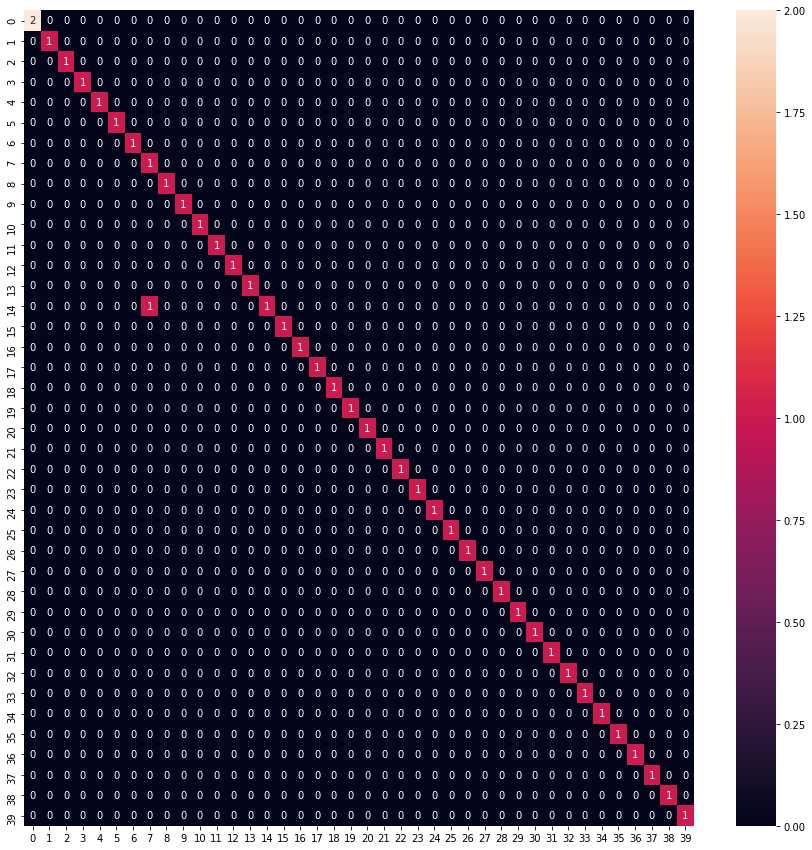

In [30]:
plt.figure(figsize=(15,15))
sns.heatmap(confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1)), annot=True)

### Using the Label Encoding

In [31]:
encoder = dict({'(vertigo) Paroymsal  Positional Vertigo':0, 'AIDS':1, 'Acne':2, 'Alcoholic hepatitis':3,
                'Allergy':4, 'Arthritis':5,'Bronchial Asthma':6, 'Cervical spondylosis':7, 'Chicken pox':8,
       'Chronic cholestasis':9, 'Common Cold':10, 'Dengue':11, 'Diabetes ':12,
       'Dimorphic hemmorhoids(piles)':13, 'Drug Reaction':14, 'Fungal infection':15,
       'GERD':16, 'Gastroenteritis':17, 'Heart attack':18, 'Hepatitis B':19, 'Hepatitis C':20,
       'Hepatitis D':21, 'Hepatitis E':22, 'Hypertension ':23, 'Hyperthyroidism':24,
       'Hypoglycemia':25, 'Hypothyroidism':26, 'Impetigo':27, 'Jaundice':28, 'Malaria':29,
       'Migraine':30, 'Osteoarthristis':31, 'Paralysis (brain hemorrhage)':32,
       'Peptic ulcer diseae':33, 'Pneumonia':34, 'Psoriasis':35, 'Tuberculosis':36,
       'Typhoid':37, 'Urinary tract infection':38, 'Varicose veins':39, 'hepatitis A':40})

In [32]:
df_trainLen = df_newtrain['prognosis'].apply(lambda typ:encoder[typ])

In [33]:
df_testLen = df_newtest['prognosis'].apply(lambda typ:encoder[typ])

In [34]:
# training data
y_trainLe = df_trainLen.values    # dependent variables  (to_array)

# testing data
y_testLe = df_testLen.values   # dependent variables  (to_array)

### Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
logR = LogisticRegression()
logR.fit(X_train, y_trainLe)

LogisticRegression()

In [36]:
y_Logpred = logR.predict(X_test)
print(f"Logistic Regression Model Accuracy on Test data : {accuracy_score(y_Logpred, y_testLe)*100:.2f}%")

Logistic Regression Model Accuracy on Test data : 100.00%


###  Naïve Bayes

In [37]:
from sklearn.naive_bayes import GaussianNB
Gnb = GaussianNB()
Gnb.fit(X_train, y_trainLe)

GaussianNB()

In [38]:
y_PredGnb = Gnb.predict(X_test)

print(f"Naïve Bayes Model Accuracy on Test data : {accuracy_score(y_testLe, y_PredGnb)*100:.2f}%")

Naïve Bayes Model Accuracy on Test data : 100.00%


###  K-Nearest Neighbours

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_trainLe)

KNeighborsClassifier()

In [40]:
y_Predknn = knn.predict(X_test)
knnScore = accuracy_score(y_testLe, y_PredGnb)
print(f"K-Nearest Neighbours Model Accuracy on Test data : {knnScore*100:.2f}%")

K-Nearest Neighbours Model Accuracy on Test data : 100.00%


## Manually testing

In [41]:
try:
    print(decoder[list(*modelRF.predict(np.array(df_newtrain.iloc[-2,:-1]).reshape(1,-1))).index(1)+1])
except:
    print(decoder[0])

Psoriasis


In [42]:
try:
    print(decoder[list(*modelDT.predict(np.array([choice([1,0]) for i in range(115)]).reshape(1,-1))).index(1)+1])
except:
    print(decoder[0])

Dengue


### Deep Learning model (Keras)

In [43]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import Adam

In [44]:
model = Sequential()
model.add(Dense(units=50, activation='relu', input_dim=df_newtrain.iloc[:,:-1].shape[1]))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=40, activation='softmax'))
Adam_lr = Adam(learning_rate=0.0001) # reduced the learning rate to prevent val_accuracy to be more then training accuracy
model.compile(optimizer=Adam_lr, loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                5800      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 40)                2040      
Total params: 10,390
Trainable params: 10,390
Non-trainable params: 0
_________________________________________________________________


In [45]:
model_history = model.fit(X_train, y_train, validation_split=0.2, batch_size=50, epochs=20)

Epoch 1/20
79/79 [==============================] - 1s 10ms/step - loss: 3.5873 - accuracy: 0.0398 - val_loss: 3.5197 - val_accuracy: 0.0732
Epoch 2/20
79/79 [==============================] - 0s 2ms/step - loss: 3.5086 - accuracy: 0.0915 - val_loss: 3.4171 - val_accuracy: 0.1463
Epoch 3/20
79/79 [==============================] - 0s 2ms/step - loss: 3.4136 - accuracy: 0.1679 - val_loss: 3.2965 - val_accuracy: 0.2927
Epoch 4/20
79/79 [==============================] - 0s 2ms/step - loss: 3.3073 - accuracy: 0.2852 - val_loss: 3.1476 - val_accuracy: 0.4634
Epoch 5/20
79/79 [==============================] - 0s 2ms/step - loss: 3.1429 - accuracy: 0.4515 - val_loss: 2.9686 - val_accuracy: 0.6341
Epoch 6/20
79/79 [==============================] - 0s 2ms/step - loss: 2.9808 - accuracy: 0.5685 - val_loss: 2.7521 - val_accuracy: 0.6829
Epoch 7/20
79/79 [==============================] - 0s 2ms/step - loss: 2.7830 - accuracy: 0.6332 - val_loss: 2.5010 - val_accuracy: 0.7805
Epoch 8/20
79/79 [=

Text(0.5, 1.0, 'Accuracy w.r.t epochs')

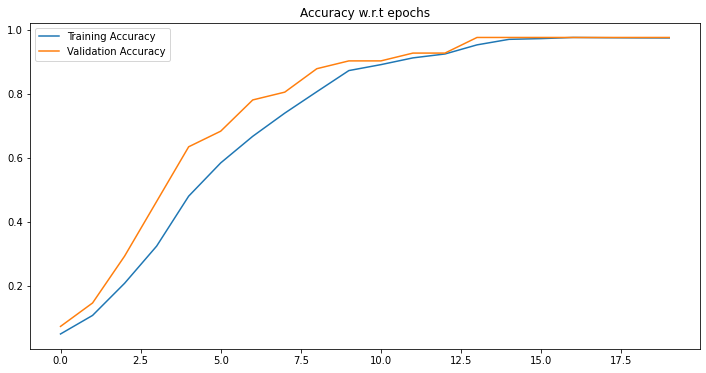

In [46]:
plt.figure(figsize=(12,6))
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.title("Accuracy w.r.t epochs")

Text(0.5, 1.0, 'Loss w.r.t epochs')

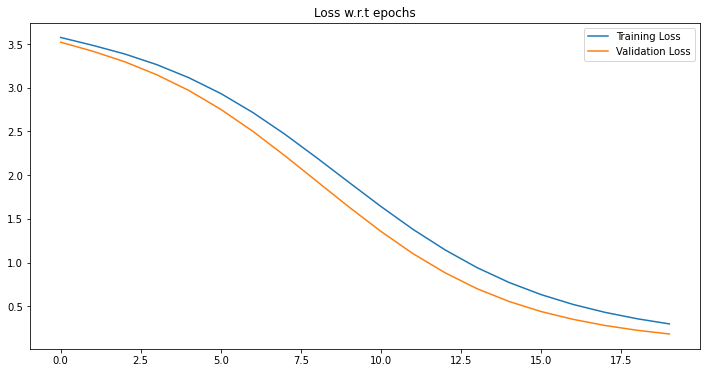

In [47]:
plt.figure(figsize=(12,6))
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.legend(['Training Loss', 'Validation Loss'])
plt.title("Loss w.r.t epochs")

In [48]:
_,accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy of the model on testing data : {accuracy*100:.2f}%")

2/2 [==============================] - 0s 4ms/step - loss: 0.2544 - accuracy: 0.9524
Accuracy of the model on testing data : 95.24%
